In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn

In [ ]:
from google.colab import files
uploaded = files.upload() # link to dataset https://github.com/AlihamzaMaan/Random-Forest-Classification/blob/main/dataset_1.csv

Saving modeling_dataset.csv to modeling_dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("modeling_dataset.csv")
print(df.head())  # Display the first few rows

   Unnamed: 0  packet_count  total_bytes  avg_packet_size  \
0           0          4155    6034168.0      1452.266667   
1           1          3388    4850245.0      1431.595336   
2           2          3664    5287877.0      1443.197871   
3           3          4108    5948521.0      1448.033350   
4           4          4412    6419061.0      1454.909565   

   avg_inter_packet_delay  std_inter_packet_delay  chunk_count  avg_ssim  \
0                1.657439                5.760497           14  0.972431   
1                2.218187                9.324953           10  0.971165   
2                1.985804                7.874238           10  0.971165   
3                1.688093                5.893905           11  0.972424   
4                1.531172                4.442955           11  0.980529   

     avg_format  avg_chunk_size  
0  1920x1080-22   401506.214286  
1  1920x1080-22   499983.900000  
2  1920x1080-22   499983.900000  
3  1920x1080-22   509411.000000  
4  192

In [ ]:
print(df.info())  # View dataset structure
print(df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2176 non-null   int64  
 1   packet_count            2176 non-null   int64  
 2   total_bytes             2176 non-null   float64
 3   avg_packet_size         2176 non-null   float64
 4   avg_inter_packet_delay  2176 non-null   float64
 5   std_inter_packet_delay  2176 non-null   float64
 6   chunk_count             2176 non-null   int64  
 7   avg_ssim                2176 non-null   float64
 8   avg_format              2176 non-null   object 
 9   avg_chunk_size          2176 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 170.1+ KB
None
        Unnamed: 0  packet_count   total_bytes  avg_packet_size  \
count  2176.000000   2176.000000  2.176000e+03      2176.000000   
mean   1087.500000   2622.931985  3.768944e+06      14

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=["avg_format", "avg_ssim"])  # target is the name of the column we are targeting, we can change this depending on which metric we are tsting for
y = df["avg_format"]

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score


# Initialize and train the model
model = RandomForestClassifier(n_estimators=100,
                               random_state=42,
                               min_samples_leaf=5,
                               max_depth=10 )
# model = RandomForestRegressor(n_estimators=50,
#                               random_state=42,
#                               min_samples_leaf=5,
#                               max_depth=20)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Predict on the test set
y_pred = model.predict(X_test)
# Check if you're accidentally using training data
# print("MSE on training set:", mean_squared_error(y_train, model.predict(X_train)))
# print("MSE on test set:", mean_squared_error(y_test, model.predict(X_test)))

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")
# Calculate accuracyf
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.79


In [ ]:
!pip install trustee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 37.4 MB/s eta 0:00:00
  Created wheel for sphinxemoji: filename=sphinxemoji-0.2.0-py3-none-any.whl size=44408 sha256=20137392b175d06440e56756a50fd3da23a65b218231b51e9ac1184780c1a92b
  Stored in directory: /root/.cache/pip/wheels/d4/b0/a5/92b0e0b5611fc4d37f90711172a680959318c4474df5d2718d
  Created whe

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels
from trustee import ClassificationTrustee

#Load dataset
df = pd.read_csv("/content/modeling_dataset.csv")

#Drop rows with missing labels
df = df.dropna(subset=['avg_format'])

#Define features and target
features = [
    'packet_count',
    'total_bytes',
    'avg_packet_size',
    'avg_inter_packet_delay',
    'std_inter_packet_delay'
]
X = df[features].fillna(0)
y = df['avg_format']

#Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#Train Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#Evaluate model accuracy
y_pred = clf.predict(X_test)
print(" Accuracy:", accuracy_score(y_test, y_pred))

labels = unique_labels(y_test, y_pred)
print("\n Classification Report (Random Forest):")
print(classification_report(y_test, y_pred, labels=labels, target_names=le.inverse_transform(labels)))

#Explain model using Trustee
trustee = ClassificationTrustee(expert=clf)
trustee.fit(X_train, y_train, num_iter=50, num_stability_iter=10, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_test)

#Evaluate decision tree fidelity and performance
all_labels = list(range(len(le.classes_)))  # Ensure all classes are considered

print("\n Model Explanation Global Fidelity Report (Tree vs Forest):")
print(classification_report(y_pred, dt_y_pred, labels=all_labels, target_names=le.classes_))

print("\n Model Explanation Score Report (Tree vs Ground Truth):")
print(classification_report(y_test, dt_y_pred, labels=all_labels, target_names=le.classes_))


 Accuracy: 0.676605504587156

 Classification Report (Random Forest):
              precision    recall  f1-score   support

 1280x720-20       0.80      0.82      0.81       213
 1280x720-22       0.00      0.00      0.00        23
 1280x720-24       0.00      0.00      0.00        19
 1280x720-26       0.50      0.15      0.24        13
1920x1080-22       0.57      0.79      0.66       145
1920x1080-24       0.00      0.00      0.00         9
  426x240-26       0.50      0.31      0.38        13
  854x480-26       0.00      0.00      0.00         1

    accuracy                           0.68       436
   macro avg       0.30      0.26      0.26       436
weighted avg       0.61      0.68      0.63       436

Initializing training dataset using RandomForestClassifier(random_state=42) as expert model
Expert model score: 1.0
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## In

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Student model 0-7 fidelity: 0.27281746031746035
########## Inner-loop Iteration 8/50 ##########
Sampling 365 points from training dataset with (2098, 2098) entries
Student model 0-8 trained with depth 12 and 79 leaves:
Student model score: 0.34940440990115734
Student model 0-8 fidelity: 0.34940440990115734
########## Inner-loop Iteration 9/50 ##########
Sampling 365 points from training dataset with (2208, 2208) entries
Student model 0-9 trained with depth 13 and 75 leaves:
Student model score: 0.3110088955087248
Student model 0-9 fidelity: 0.3110088955087248
########## Inner-loop Iteration 10/50 ##########
Sampling 365 points from training dataset with (2318, 2318) entries
Student model 0-10 trained with depth 10 and 74 leaves:
Student model score: 0.274582560296846
Student model 0-10 fidelity: 0.274582560296846
########## Inner-loop Iteration 11/50 ##########
Sampling 365 points from training dataset with (2428, 2428) entries
Student model 0-11 trained with depth 17 and 78 leaves:
St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted sam

Initializing training dataset using RandomForestClassifier(random_state=42) as expert model
Expert model score: 1.0
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 365 points from training dataset with (1218, 1218) entries
Student model 0-0 trained with depth 12 and 92 leaves:
Student model score: 0.19421948673649353
Student model 0-0 fidelity: 0.19421948673649353
########## Inner-loop Iteration 1/50 ##########
Sampling 365 points from training dataset with (1328, 1328) entries
Student model 0-1 trained with depth 11 and 77 leaves:
Student model score: 0.24186430622289934
Student model 0-1 fidelity: 0.24186430622289934
########## Inner-loop Iteration 2/50 ##########
Sampling 365 points from training dataset with (1438, 1438) entries
Student model 0-2 trained with depth 14 and 85 leaves:
Student model score: 0.20085470085470086
St

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_divisio

Streaming output truncated to the last 5000 lines.
           5      0.000     0.000     0.000         9
           6      0.000     0.000     0.000        13
           8      0.000     0.000     0.000         1

    accuracy                          0.654       436
   macro avg      0.163     0.200     0.178       436
weighted avg      0.547     0.654     0.593       436

Top-k Model explanation score report:

              precision    recall  f1-score   support

           0      0.736     0.784     0.759       213
           1      0.000     0.000     0.000        23
           2      0.000     0.000     0.000        19
           3      0.000     0.000     0.000        13
           4      0.565     0.814     0.667       145
           5      0.000     0.000     0.000         9
           6      0.000     0.000     0.000        13
           8      0.000     0.000     0.000         1

    accuracy                          0.654       436
   macro avg      0.163     0.200     0.17

Done!
Plotting...


Streaming output truncated to the last 5000 lines.


KeyboardInterrupt: 

<Figure size 3000x300 with 0 Axes>

<Figure size 4000x300 with 0 Axes>

<Figure size 5000x300 with 0 Axes>

<Figure size 5000x300 with 0 Axes>

<Figure size 4000x300 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 4000x300 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 5000x1000 with 0 Axes>

<Figure size 4000x300 with 0 Axes>

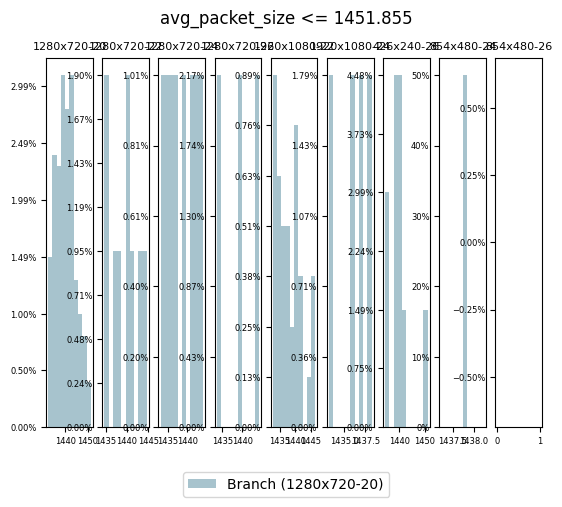

In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.multiclass import unique_labels
from trustee import ClassificationTrustee
from trustee.report.trust import TrustReport

#Trustee explanation
trustee = ClassificationTrustee(expert=clf)
trustee.fit(X_train, y_train, num_iter=50, num_stability_iter=10, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_test)

#Evaluate surrogate fidelity
all_labels = list(range(len(le.classes_)))  #Ensure all classes are covered

print("\n Model Explanation Global Fidelity Report (Tree vs Forest):")
print(classification_report(y_pred, dt_y_pred, labels=all_labels, target_names=le.classes_))

print("\n Model Explanation Score Report (Tree vs Ground Truth):")
print(classification_report(y_test, dt_y_pred, labels=all_labels, target_names=le.classes_))

#There are errora with saving it
OUTPUT_PATH = "out/"
REPORT_PATH = f"{OUTPUT_PATH}/report/trust_report.obj"
os.makedirs(os.path.dirname(REPORT_PATH), exist_ok=True)

trust_report = TrustReport(
    clf,
    X=X,
    y=y_encoded,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    max_iter=5,
    num_pruning_iter=5,
    trustee_num_iter=10,
    trustee_num_stability_iter=5,
    trustee_sample_size=0.3,
    analyze_branches=True,
    analyze_stability=True,
    top_k=10,
    verbose=True,
    class_names=le.classes_,
    feature_names=features,
    is_classify=True,
)

trust_report.save(REPORT_PATH)
print(f" Report saved to: {REPORT_PATH}")
